In [1]:
import pandas as pd

# Load the combined DataFrame
df = pd.read_parquet("data/jump_df.parquet")
print(f"Total number of rows in the full dataset: {len(df):,}")

# Display the distribution
distribution = (
    df.groupby(["Metadata_PlateType", "Metadata_Source"])
    .size()
    .reset_index(name="counts")
)
print("\nDistribution of combinations of 'Metadata_PlateType' and 'Metadata_Source':")
display(distribution)

# Calculate proportions
total_counts = df.shape[0]
distribution["proportion"] = distribution["counts"] / total_counts
display(distribution)

Total number of rows in the full dataset: 7,708,265

Distribution of combinations of 'Metadata_PlateType' and 'Metadata_Source':


,Metadata_PlateType,Metadata_Source,counts
0,COMPOUND,source_1,243196
1,COMPOUND,source_10,479164
2,COMPOUND,source_11,570225
3,COMPOUND,source_2,503664
4,COMPOUND,source_3,134775
5,COMPOUND,source_4,107520
6,COMPOUND,source_5,680814
7,COMPOUND,source_6,777505
8,COMPOUND,source_7,414637
9,COMPOUND,source_8,687609


,Metadata_PlateType,Metadata_Source,counts,proportion
0,COMPOUND,source_1,243196,0.031550
1,COMPOUND,source_10,479164,0.062162
2,COMPOUND,source_11,570225,0.073976
3,COMPOUND,source_2,503664,0.065341
4,COMPOUND,source_3,134775,0.017484
5,COMPOUND,source_4,107520,0.013949
6,COMPOUND,source_5,680814,0.088323
7,COMPOUND,source_6,777505,0.100866
8,COMPOUND,source_7,414637,0.053791
9,COMPOUND,source_8,687609,0.089204


In [2]:
def stratified_sample(df, strata_cols, frac, random_state=None):
    """
    Perform a stratified sample of the DataFrame based on the specified strata columns.

    Args:
        df (pd.DataFrame): The DataFrame to sample from.
        strata_cols (list): The columns to use for stratification.
        frac (float): The fraction of the dataset to sample (between 0 and 1).
        random_state (int, optional): A seed for the random number generator.

    Returns:
        pd.DataFrame: The stratified sampled DataFrame.
    """
    grouped = df.groupby(strata_cols, group_keys=False)
    sampled_df = grouped.apply(lambda x: x.sample(frac=frac, random_state=random_state))
    return sampled_df.reset_index(drop=True)

In [3]:
# Define the fraction sizes
fractions = [0.00001, 0.0001, 0.001]

# Define the strata columns
strata_columns = ["Metadata_PlateType", "Metadata_Source"]

# Create a dictionary to hold the subsets
subsets = {}

for frac in fractions:
    print(f"\nCreating a subset with {frac * 100}% of the data...")
    subset = stratified_sample(df, strata_columns, frac, random_state=42)
    subsets[frac] = subset
    print(f"Subset with {len(subset):,} rows created.")


Creating a subset with 0.001% of the data...


/var/folders/3x/wb42gyq95ts03_70yq2vdc_h0000gn/T/ipykernel_82569/2211771598.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = grouped.apply(lambda x: x.sample(frac=frac, random_state=random_state))


Subset with 75 rows created.

Creating a subset with 0.01% of the data...


/var/folders/3x/wb42gyq95ts03_70yq2vdc_h0000gn/T/ipykernel_82569/2211771598.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = grouped.apply(lambda x: x.sample(frac=frac, random_state=random_state))


Subset with 768 rows created.

Creating a subset with 0.1% of the data...
Subset with 7,711 rows created.


/var/folders/3x/wb42gyq95ts03_70yq2vdc_h0000gn/T/ipykernel_82569/2211771598.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = grouped.apply(lambda x: x.sample(frac=frac, random_state=random_state))



Comparing distributions for subset with 0% of data:


/var/folders/3x/wb42gyq95ts03_70yq2vdc_h0000gn/T/ipykernel_82569/2096734387.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


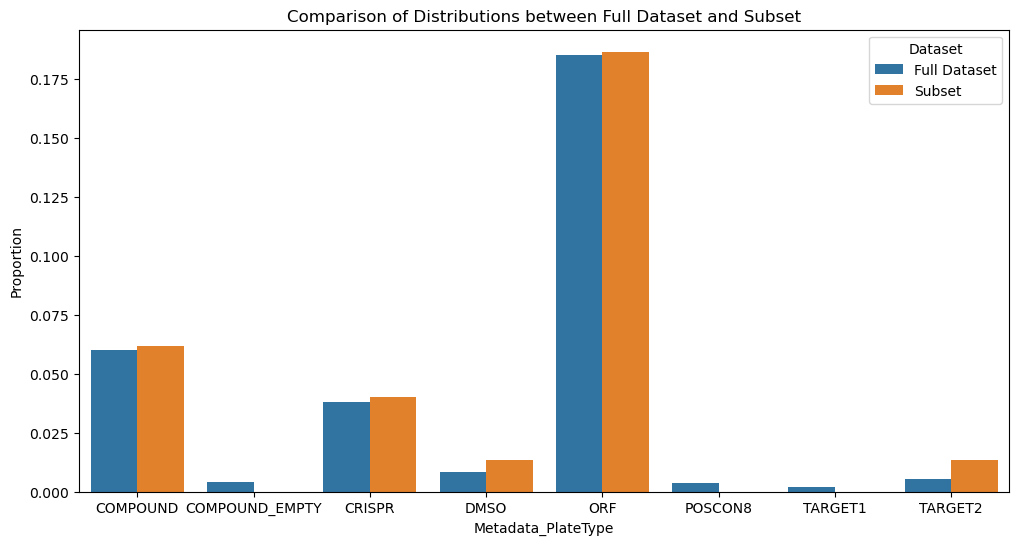

Dataset,Metadata_PlateType,Metadata_Source,Full Dataset,Subset
0,COMPOUND,source_1,0.031550,0.026667
1,COMPOUND,source_10,0.062162,0.066667
2,COMPOUND,source_11,0.073976,0.080000
3,COMPOUND,source_2,0.065341,0.066667
4,COMPOUND,source_3,0.017484,0.013333
5,COMPOUND,source_4,0.013949,0.013333
6,COMPOUND,source_5,0.088323,0.093333
7,COMPOUND,source_6,0.100866,0.106667
8,COMPOUND,source_7,0.053791,0.053333
9,COMPOUND,source_8,0.089204,0.093333



Comparing distributions for subset with 0% of data:


/var/folders/3x/wb42gyq95ts03_70yq2vdc_h0000gn/T/ipykernel_82569/2096734387.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


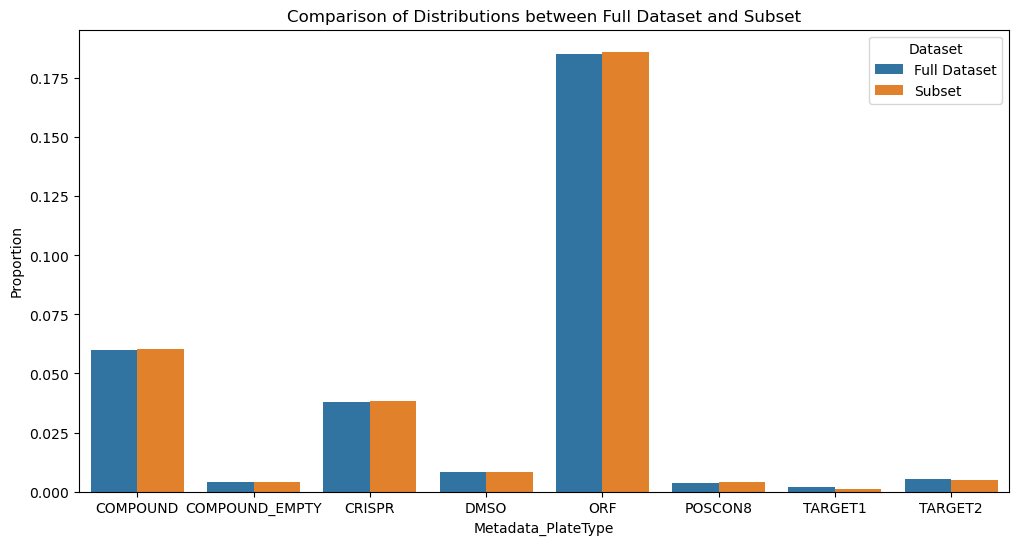

Dataset,Metadata_PlateType,Metadata_Source,Full Dataset,Subset
0,COMPOUND,source_1,0.031550,0.031250
1,COMPOUND,source_10,0.062162,0.062500
2,COMPOUND,source_11,0.073976,0.074219
3,COMPOUND,source_2,0.065341,0.065104
4,COMPOUND,source_3,0.017484,0.016927
5,COMPOUND,source_4,0.013949,0.014323
6,COMPOUND,source_5,0.088323,0.088542
7,COMPOUND,source_6,0.100866,0.101562
8,COMPOUND,source_7,0.053791,0.053385
9,COMPOUND,source_8,0.089204,0.089844



Comparing distributions for subset with 0% of data:


/var/folders/3x/wb42gyq95ts03_70yq2vdc_h0000gn/T/ipykernel_82569/2096734387.py:25: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


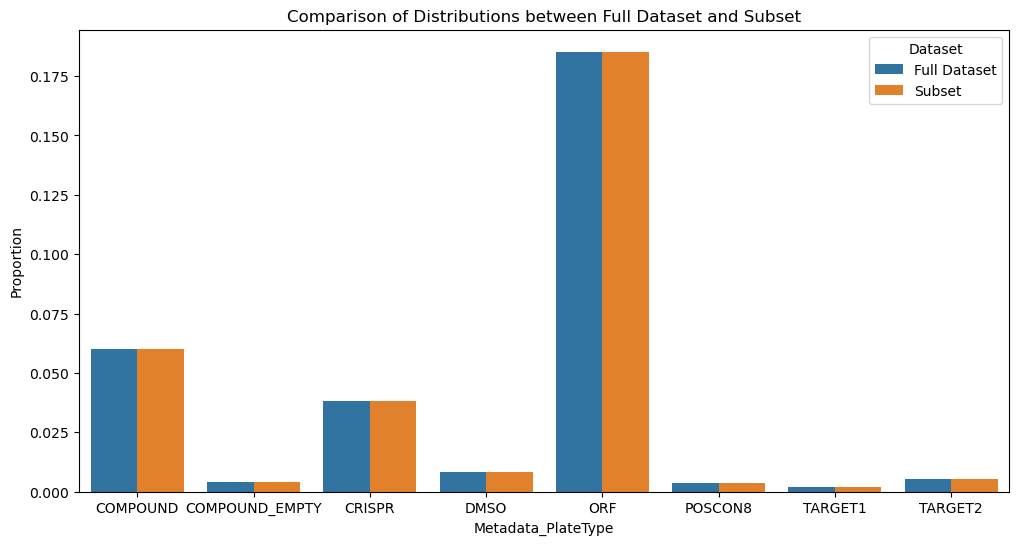

Dataset,Metadata_PlateType,Metadata_Source,Full Dataset,Subset
0,COMPOUND,source_1,0.031550,0.031513
1,COMPOUND,source_10,0.062162,0.062119
2,COMPOUND,source_11,0.073976,0.073920
3,COMPOUND,source_2,0.065341,0.065361
4,COMPOUND,source_3,0.017484,0.017507
5,COMPOUND,source_4,0.013949,0.014006
6,COMPOUND,source_5,0.088323,0.088315
7,COMPOUND,source_6,0.100866,0.100895
8,COMPOUND,source_7,0.053791,0.053819
9,COMPOUND,source_8,0.089204,0.089223


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


def compare_distributions(full_df, subset_df, strata_cols):
    # Calculate counts and proportions in the full dataset
    full_distribution = full_df.groupby(strata_cols).size().reset_index(name="counts")
    full_distribution["proportion"] = full_distribution["counts"] / len(full_df)
    full_distribution["Dataset"] = "Full Dataset"

    # Calculate counts and proportions in the subset
    subset_distribution = (
        subset_df.groupby(strata_cols).size().reset_index(name="counts")
    )
    subset_distribution["proportion"] = subset_distribution["counts"] / len(subset_df)
    subset_distribution["Dataset"] = "Subset"

    # Combine the distributions
    combined_distribution = pd.concat(
        [full_distribution, subset_distribution], ignore_index=True
    )

    # Plot the comparison
    plt.figure(figsize=(12, 6))
    sns.barplot(
        data=combined_distribution,
        x="Metadata_PlateType",
        y="proportion",
        hue="Dataset",
        ci=None,
    )
    plt.title("Comparison of Distributions between Full Dataset and Subset")
    plt.ylabel("Proportion")
    plt.show()

    # Print comparison table
    pivot_table = combined_distribution.pivot_table(
        values="proportion", index=strata_cols, columns="Dataset"
    ).reset_index()
    display(pivot_table)


# Compare distributions for each subset
for frac, subset in subsets.items():
    print(f"\nComparing distributions for subset with {int(frac * 100)}% of data:")
    compare_distributions(df, subset, strata_columns)

In [6]:
import os

output_dir = "data/subsets"
os.makedirs(output_dir, exist_ok=True)

for frac, subset in subsets.items():
    percentage = str(frac * 100)
    output_path = os.path.join(output_dir, f"subset_{percentage}percent.parquet")
    subset.to_parquet(output_path)
    print(f"Subset ({percentage}%) saved to {output_path}")

Subset (0.001%) saved to data/subsets/subset_0.001percent.parquet
Subset (0.01%) saved to data/subsets/subset_0.01percent.parquet
Subset (0.1%) saved to data/subsets/subset_0.1percent.parquet
